<h2>Athlete Stress, Performance and Recovery Analysis</h2>

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let us load the dataset and observe the features present in it

In [3]:
# Loading the dataset
df = pd.read_csv('collegiate_athlete_injury_dataset.csv')

# Looking at info about the dataset
print(df.info())

# Displaying the first few rows of the dataset
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Athlete_ID                200 non-null    object
 1   Age                       200 non-null    int64 
 2   Gender                    200 non-null    object
 3   Height_cm                 200 non-null    int64 
 4   Weight_kg                 200 non-null    int64 
 5   Position                  200 non-null    object
 6   Training_Intensity        200 non-null    int64 
 7   Training_Hours_Per_Week   200 non-null    int64 
 8   Recovery_Days_Per_Week    200 non-null    int64 
 9   Match_Count_Per_Week      200 non-null    int64 
 10  Rest_Between_Events_Days  200 non-null    int64 
 11  Fatigue_Score             200 non-null    int64 
 12  Performance_Score         200 non-null    int64 
 13  Team_Contribution_Score   200 non-null    int64 
 14  Load_Balance_Score        

,Athlete_ID,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
0,A001,24,Female,195,99,Center,2,13,2,3,1,1,99,58,100,4,0
1,A002,21,Male,192,65,Forward,8,14,1,3,1,4,55,63,83,73,0
2,A003,22,Male,163,83,Guard,8,8,2,1,3,6,58,62,100,62,0
3,A004,24,Female,192,90,Guard,1,13,1,1,1,7,82,74,78,51,0
4,A005,20,Female,173,79,Center,3,9,1,2,1,2,90,51,83,49,0


There are <b>200</b> instances in the data. From the above info, it can be easily infered that there are no missing values in any of the columns.

Lets look at the distribution of fatigue scores in the dataset

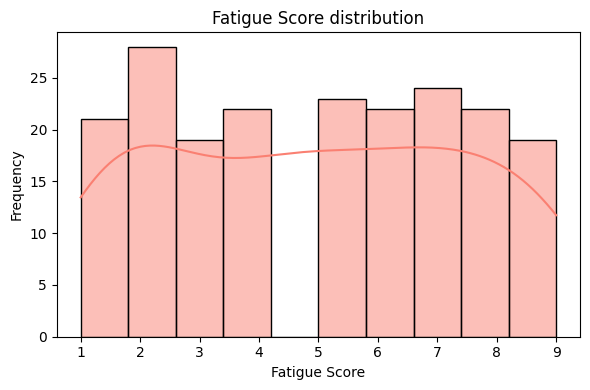

In [4]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Fatigue_Score"], kde=True, bins=10, color="salmon")
plt.title("Fatigue Score distribution")
plt.xlabel("Fatigue Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Fatigue score is fairly distributed. Lets look at the correlation matrix

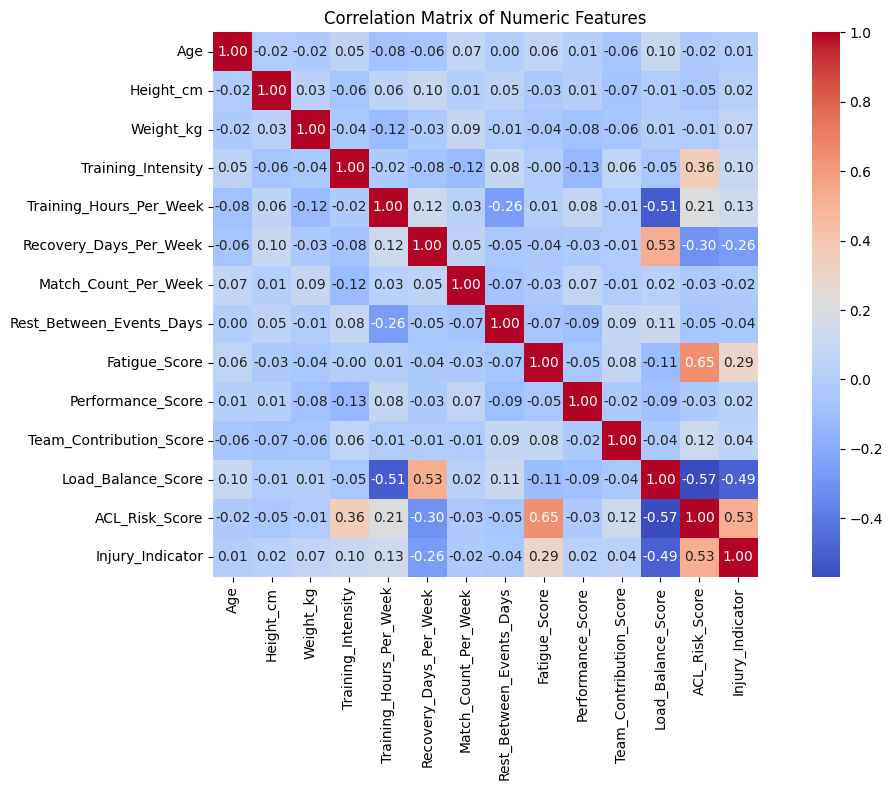

In [5]:
num_cols = df.select_dtypes(include="number").columns
plt.figure(figsize=(12, 8))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

We can draw the following conclusions from the above matrix:- 
<ul>
    <li><i>Load_Balance_Score</i> and <i>ACL_Risk_Score</i> are fairly negatively correlated which is obvious since low <i>Load_Balance_Score</i> increases the risk of injury leading to high <i>ACL_Risk_Score</i> and vice versa.</li>
    <li>On similar grounds we can the say the same about <i>ACL_Risk_Score</i> and <i>Fatigue_Score</i> who are quite positively correlated.</li>
</ul>

Lets now look into performance of injured atheletes

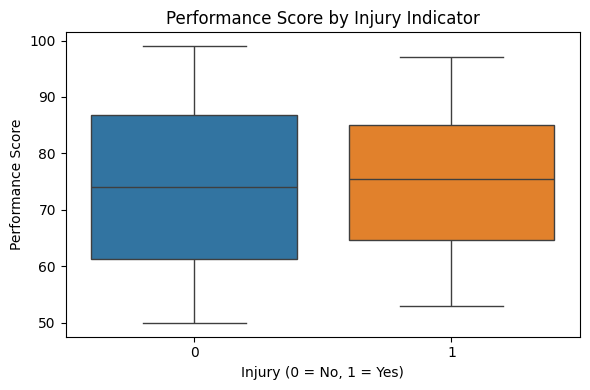

In [10]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="Injury_Indicator", y="Performance_Score", hue = 'Injury_Indicator', legend=False)
plt.title("Performance Score by Injury Indicator")
plt.xlabel("Injury (0 = No, 1 = Yes)")
plt.ylabel("Performance Score")
plt.tight_layout()
plt.show()

Seems like Athletes' performance are better when they are not injured

We can add the following product features:-

<ul>
    <li>Recovery to be scheduled to prevent injuries.</li>
    <li>Performance can be optimized by monitoring fatigue and load balance.</li>
    <li>Alerts to be generated basis fatigue and intensity.</li>
</ul>